In [1]:
from parsers import TSP
from algs import simple_greed

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import ggplot, aes, geom_point, geom_hline, ggtitle, theme_538

import pandas as pd

In [2]:
tsp_prob = TSP(file="../data/a280.tsp")

In [3]:
costs = pd.DataFrame(columns=["$N$", "Tour length"])

for n in tsp_prob.graph.nodes_iter():
    costs = costs.append({"$N$": n,
                          "Tour length": simple_greed(tsp_prob, n)},
                         ignore_index=True)
    
costs.head()

,$N$,Tour length
0,1.0,47503.047895
1,2.0,45586.680982
2,3.0,41883.460166
3,4.0,39855.196848
4,5.0,41853.675830


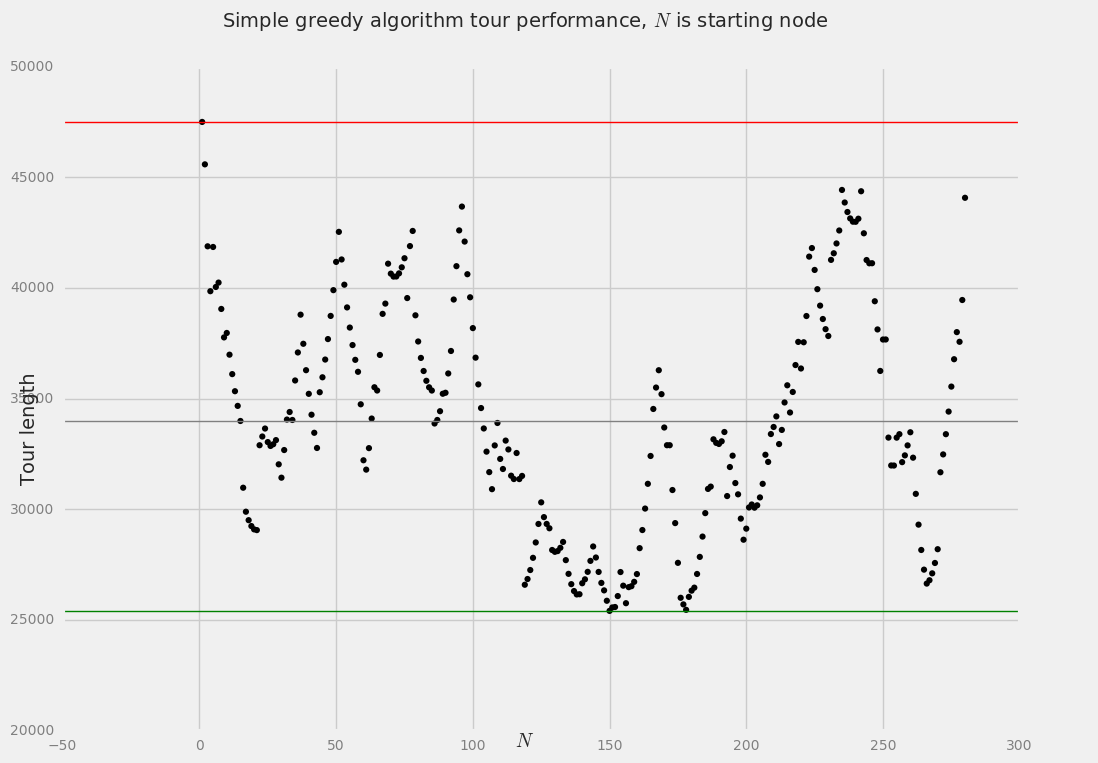

In [4]:
p = ggplot(costs,
       aes(x="$N$",
           y="Tour length")) +\
geom_point() +\
geom_hline(y=costs["Tour length"].mean(), color="grey") +\
geom_hline(y=costs["Tour length"].max(), color="red") +\
geom_hline(y=costs["Tour length"].min(), color="green") +\
ggtitle("Simple greedy algorithm tour performance, $N$ is starting node") +\
theme_538()

p.save("img/Simple greedy algorithm performance.png")

In [6]:
%%timeit
costs = pd.DataFrame(columns=["$N$", "Tour length"])

for n in tsp_prob.graph.nodes_iter():
    costs = costs.append({"$N$": n,
                          "Tour length": simple_greed(tsp_prob, n)},
                         ignore_index=True)

1 loop, best of 3: 8.64 s per loop
